# **Report on Breast Cancer Diagnosis Prediction:**
## **A Comprehensive Analysis Using...**

### **Logistic Regression**

### **K-Nearest Neighbors**

### **Random Forest**

# **Submitted by: M ABBAS**

## Table of Contents

1. [Introduction](#introduction)
    
2. [Objectives](#objectives)
    
3. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
    - [3.1 - Handling Missing Values](#handling-missing-values)
    - [3.2 - Removing Duplicates](#removing-duplicates)
    - [3.3 - Removing Unnecessary Features](#removing-unnecessary-features)
        
4. [Feature Engineering](#feature-engineering)
    - [4.1 - Standard Scaler](#standard-scaler)
    - [4.2 - MinMax Scaler](#minmax-scaler)
        
5. [Correlation Analysis](#correlation-analysis)
    
6. [Modeling](#modeling)
    - [6.1 - Logistic Classification](#logistic-classification)
        - [6.1.1 - L2 Classification](#l2-classification)
        - [6.1.2 - L1 Classification](#l1-classification)
    - [6.2 - KNN Classification](#knn-classification)
    - [6.3 - Random Forest Classification](#random-forest-classification)
        
7. [Comparing Models](#comparing-models)
    
8. [Conclusion](#conclusion)
    
9. [Next Steps](#next-steps)
    
10. [Key Insights](#key-insights)
    
11. [Suggestions](#suggestions)

### 1 Introduction

In this project, we analyze data from a heart disease study to understand how different health factors relate to heart disease. Our goals include finding out which features are most important for predicting heart disease and testing different models like logistic regression, KNN classification, and random forest classification to see which one predicts heart disease the best. This will help us better understand the risk factors and improve heart disease predictions.

Identify Key Factors Influencing Heart Disease: Explore and analyze the heart disease dataset to determine which health factors are most strongly associated with the likelihood of having heart disease.

Quantify Relationships Between Health Features and Heart Disease: Use statistical methods such as correlation analysis and classification modeling to measure how different health features relate to heart disease.

Evaluate Model Performance: Assess the effectiveness of various predictive models, including logistic regression, KNN classification, and random forest classification, in predicting heart disease based on health features. Determine the accuracy and reliability of these models.

Enhance Data Analysis Skills: Improve understanding of data analysis techniques and methodologies by applying them to a real-world health dataset, thereby advancing skills in data interpretation and visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd

# Load Cancer Patients dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
    'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df_cancer_patients = pd.read_csv(url, header=None, names=columns)

# Display the first few rows
df_cancer_patients.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df_cancer_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df_cancer_patients.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3 Data Cleaning and Preprocessing
Describe the steps taken to clean and preprocess the data, including:
- Handling missing values
- Removing duplicates
- dropping unnecessary features

## 3.1 Handling missing values

In [5]:
df_cancer_patients.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Text(0.5, 1.0, 'Total missing values ')

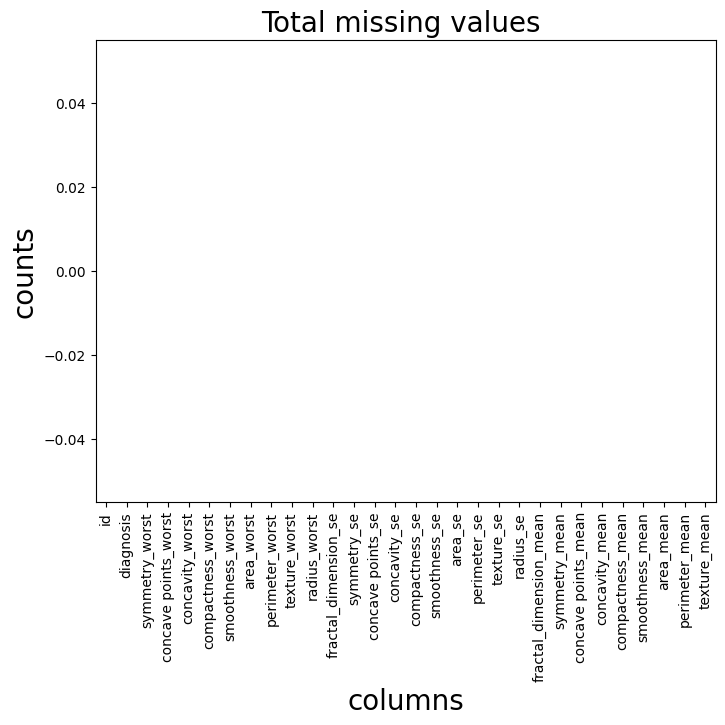

In [6]:
#Handling any null values...
total = df_cancer_patients.isnull().sum().sort_values(ascending=False)
total_select = total.head(30)
total_select.plot(kind = 'bar', figsize = (8,6), fontsize = 10)
plt.xlabel("columns", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.title("Total missing values ", fontsize = 20)

**After a thorough examination of the dataset,from the above diagram it has been confirmed that there are no missing values present.**

## 3.2 Removing duplicates

In [7]:
df_cancer_patients.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [8]:
#Alternatively wat to check duplicate...
df_cancer_patients.index.is_unique

True

**After examination for duplicates across all columns of the dataset, it has been thoroughly verified that there are no duplicate entries present. This ensures the integrity and uniqueness of the data for further analysis.**

## 3.3 dropping unnecessary features

In [9]:
df_cancer_patients = df_cancer_patients.drop(columns=['id'])

In [10]:
df_cancer_patients['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis'>

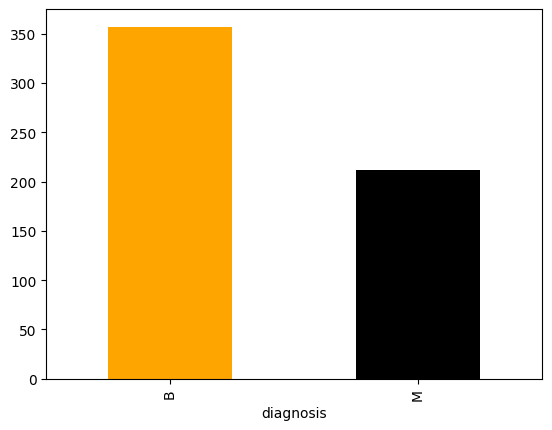

In [11]:
df_cancer_patients['diagnosis'].value_counts().plot.bar(color=['orange','black'])

**After examination for the target features(diagnosis) it has beenn confirmed that the features is no high imbalance.**

In [12]:
# Encode the diagnosis column (Malignant: 1, Benign: 0)
#df_cancer_patients['diagnosis'] = df_cancer_patients['diagnosis'].map({'M': 1, 'B': 0})
features = df_cancer_patients.drop(columns=['diagnosis'])


In [13]:
features.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 4. Feature Engineering

### 4.1 Standard Scalar

In [14]:
'''# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Check the range of the scaled features
print(f"Scaled feature range: {df_scaled.min().min()} to {df_scaled.max().max()}")'''

'# Fit and transform the features\nscaled_features = scaler.fit_transform(features)\n\n# Convert the scaled features back to a DataFrame\ndf_scaled = pd.DataFrame(scaled_features, columns=features.columns)\n\n# Check the range of the scaled features\nprint(f"Scaled feature range: {df_scaled.min().min()} to {df_scaled.max().max()}")'

### 4.2 MinMax Scaler

In [15]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Check the range of the scaled features
print(f"Scaled feature range: {df_scaled.min().min()} to {df_scaled.max().max()}")

Scaled feature range: 0.0 to 1.0000000000000002


## Encoding Categorical column

In [16]:
# Encode the diagnosis column (Malignant: 1, Benign: 0)
df_cancer_patients['diagnosis'] = df_cancer_patients['diagnosis'].map({'M': 1, 'B': 0})

In [17]:
df_cancer_patients

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 5 Correlation

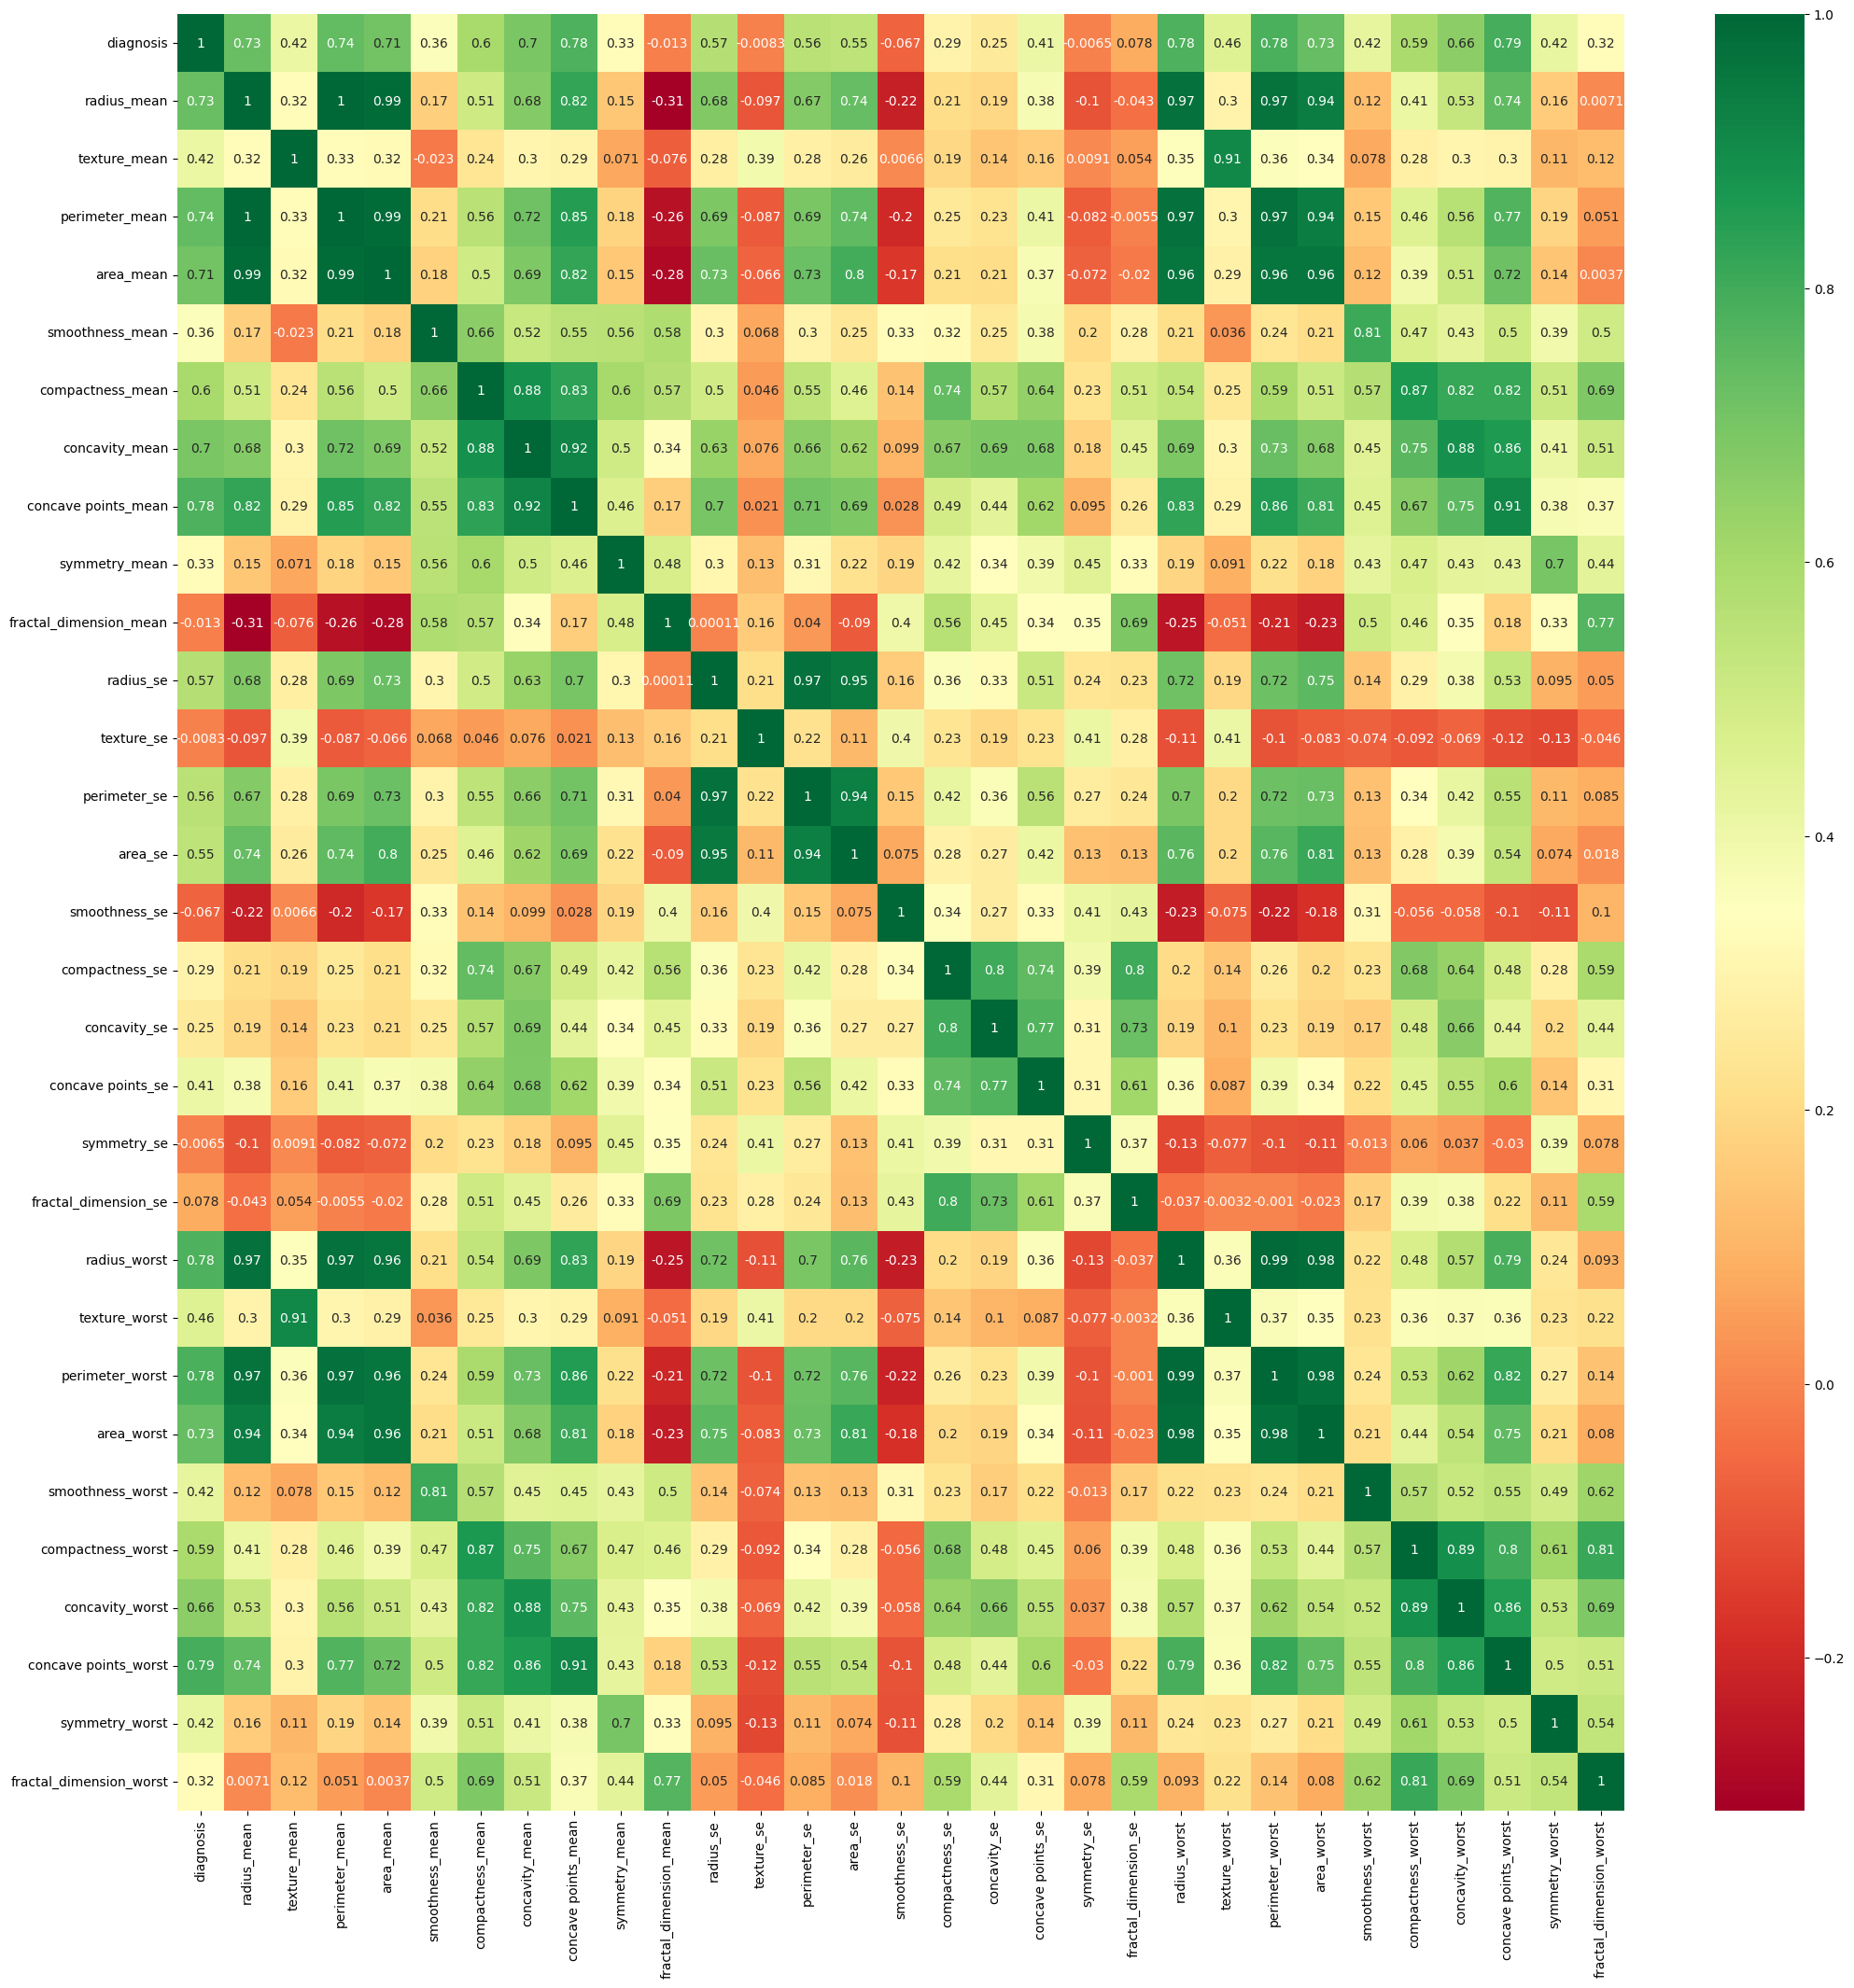

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(df_cancer_patients.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [19]:
correlation = df_cancer_patients.corr()['diagnosis'].sort_values()
correlation

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

<Axes: >

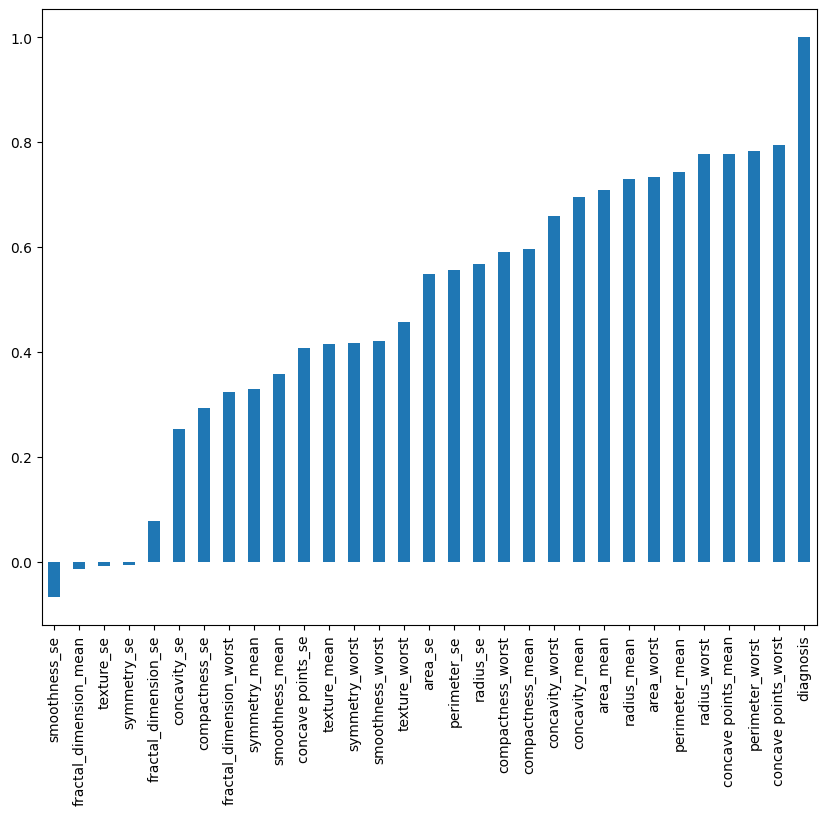

In [20]:
correlation.plot(kind='bar',figsize=(10,8))

**After examining the relationship of features with the target feature (diagnosis), we observe the following:**

**Strong Positive Correlations:**

- **concave points_worst**: 0.794
- **perimeter_worst**: 0.783
- **concave points_mean**: 0.777

**Weak or No Correlations:**

- **fractal_dimension_mean**: -0.013
- **texture_se**: -0.008
- **symmetry_se**: -0.007

**Further correlations:**

- **compactness_mean**: 0.597
- **concavity_worst**: 0.660
- **area_mean**: 0.709
- **radius_mean**: 0.730
- **area_worst**: 0.734
- **perimeter_mean**: 0.743
- **radius_worst**: 0.776

**These results indicate that features like concave points_worst and perimeter_worst have strong positive relationships with the diagnosis, while others show weak or no correlations.**

## Modeling

In [21]:
X = df_cancer_patients.drop(columns=['diagnosis'])
y = df_cancer_patients['diagnosis']

In [22]:
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [23]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

## Logistic Classification 6.1

In [24]:
# First, let's split the training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

In [25]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (455, 30), y_train: (455,)


In [26]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (114, 30), y_test: (114,)


## L2 Classification 6.1.1

In [27]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [28]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=123, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [29]:
l2_model.fit(X_train, y_train)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [30]:
l2_preds = l2_model.predict(X_test)

In [31]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [32]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.956140350877193,
 'recall': array([0.95833333, 0.95238095]),
 'precision': array([0.97183099, 0.93023256]),
 'f1score': array([0.96503497, 0.94117647])}

**L2 Model Performance:**

The L1 model achieved an accuracy of 95.61%. It has high recall (95.83% for class 0 and 95.24% for class 1), indicating it correctly identifies most positive cases. The precision is also strong (97.18% for class 0 and 93.02% for class 1), showing the model's predictions are reliable. The F1 scores (96.50% for class 0 and 94.12% for class 1) reflect a good balance between precision and recall.

## Confusion Metrics

In [33]:
cf = confusion_matrix(y_test, l2_preds, normalize='true')

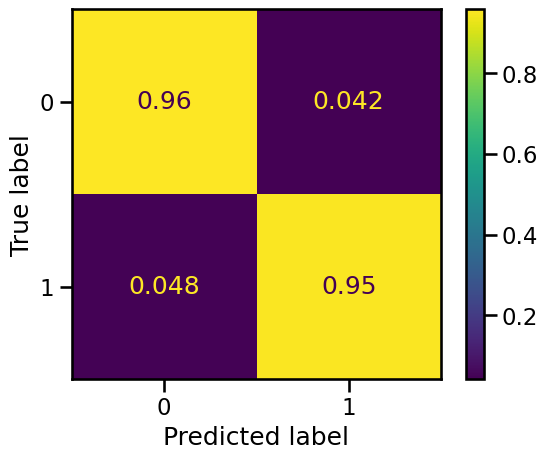

In [34]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l2_model.classes_)
disp.plot()
plt.show()

## L1 Classification  6.1.2

In [35]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [36]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=123, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

In [37]:
l1_model.fit(X_train, y_train)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=123, solver='saga')

In [38]:
l1_preds = l1_model.predict(X_test)

In [39]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.9210526315789473,
 'recall': array([0.95833333, 0.85714286]),
 'precision': array([0.92      , 0.92307692]),
 'f1score': array([0.93877551, 0.88888889])}

**L1 Model Performance:**

The L1 model achieved an accuracy of 92.11%. It has high recall (95.83% for class 0 and 85.71% for class 1), indicating it correctly identifies most positive cases. The precision is also strong (92.00% for class 0 and 92.31% for class 1), showing the model's predictions are reliable. The F1 scores (93.88% for class 0 and 88.89% for class 1) reflect a good balance between precision and recall.

## Confusion Metrics

In [40]:
cf = confusion_matrix(y_test, l1_preds, normalize='true')

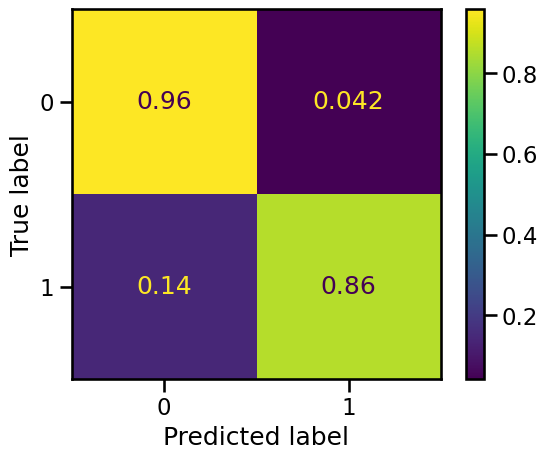

In [41]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1_model.classes_)
disp.plot()
plt.show()

In [42]:
l1_model.coef_

array([[-6.05786559e-03, -3.92830506e-03, -3.26957713e-02,
        -7.39360446e-03,  0.00000000e+00,  2.94100646e-05,
         1.35462330e-04,  2.14082172e-06, -6.02716077e-06,
         0.00000000e+00,  0.00000000e+00, -3.10228460e-04,
         3.13322420e-04,  1.08287543e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -6.42108049e-03,
        -3.28387576e-03, -2.96666960e-02,  1.31996000e-02,
         0.00000000e+00,  3.34735838e-04,  5.33556753e-04,
         6.08542041e-05, -5.08827378e-06,  0.00000000e+00]])

## Features Importance

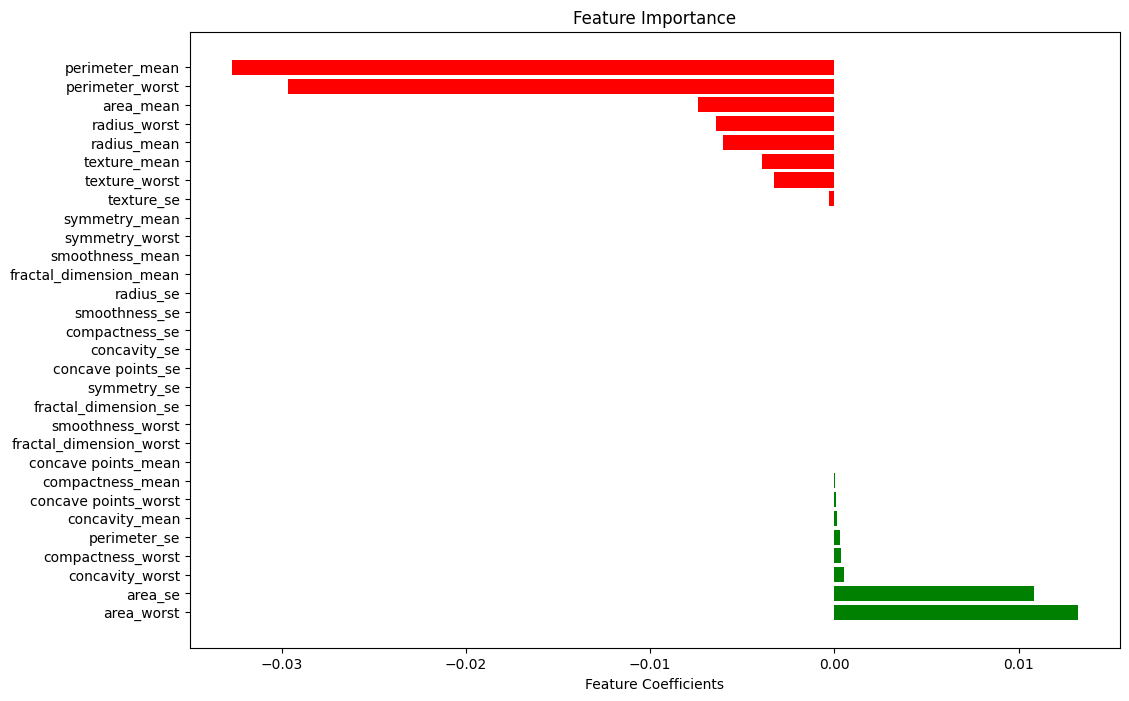

In [43]:
# Example function to get all feature coefficients without filtering
def get_all_feature_coefs(regression_model, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[0, :], columns):
        coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Example function to generate bar colors based on coefficient values
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Example function to visualize coefficients
def visualize_all_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('Feature Importance')
    plt.show()

# Assuming l1_model is a fitted logistic regression model
# Assuming 'features' is defined and contains the list of feature column names
coef_dict = get_all_feature_coefs(l1_model, features)

# Visualize the coefficients
visualize_all_coefs(coef_dict)

### Feature Importance in the L1 Model

After analyzing the feature importance using the L1 model, we observe the following:

**Features with High Positive Coefficients (Green Lines):**
- `area_worst`
- `area_se`
- `concavity_worst`

These features have high positive coefficients, indicating they are significantly important and positively correlated with the target variable (diagnosis).

**Features with High Negative Coefficients (Red Lines):**
- `perimeter_mean`
- `perimeter_worst`
- `area_mean`
- `radius_worst`

These features have high negative coefficients, indicating they are significantly important and negatively correlated with the target variable (diagnosis).

This analysis helps identify which features have the most influence on the model's predictions, providing valuable insights into the factors affecting the diagnosis.

In [45]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd

# Get predictions from the models
y_pred = pd.DataFrame({
    'l1': l1_model.predict(X_test),
    'l2': l2_model.predict(X_test)
})

# Initialize lists to store metrics and confusion matrices
metrics = list()
cm = dict()

# Labels for the models
coeff_labels = ['l1', 'l2']

# Iterate over models to compute metrics
for lab in coeff_labels:
    # Compute precision, recall, f-score
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # Binarize the data for ROC-AUC computation
    y_test_binarized = label_binarize(y_test, classes=[0, 1])
    y_pred_binarized = label_binarize(y_pred[lab], classes=[0, 1])
    
    # Compute ROC-AUC score
    auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted')
    
    # Compute confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    # Append metrics to the list
    metrics.append(pd.Series({
        'precision': precision,
        'recall': recall,
        'fscore': fscore,
        'accuracy': accuracy,
        'auc': auc
    }, name=lab))

# Combine metrics into a DataFrame
metrics_df = pd.concat(metrics, axis=1)

# Display the results
print("Model Performance Metrics:")
metrics_df


Model Performance Metrics:


,l1,l2
precision,0.921134,0.956505
recall,0.921053,0.956140
fscore,0.920396,0.956245
accuracy,0.921053,0.956140
auc,0.907738,0.955357


### Model Performance Metrics Comparison

The table below summarizes the performance metrics for the L1 and L2 models:

| Metric     | L1         | L2         |
|------------|------------|------------|
| Precision  | 0.921134   | 0.956505   |
| Recall     | 0.921053   | 0.956140   |
| F-Score    | 0.920396   | 0.956245   |
| Accuracy   | 0.921053   | 0.956140   |
| AUC        | 0.907738   | 0.955357   |

**Explanation:**
- **Precision:** The L2 model has a higher precision (0.9565) compared to the L1 model (0.9211), indicating it makes fewer false positive predictions.
- **Recall:** The L2 model also outperforms the L1 model in recall (0.9561 vs. 0.9211), meaning it identifies more true positives.
- **F-Score:** The L2 model achieves a higher F-score (0.9562) compared to the L1 model (0.9204), showing a better balance between precision and recall.
- **Accuracy:** The accuracy of the L2 model (0.9561) is higher than that of the L1 model (0.9211), indicating better overall correctness.
- **AUC:** The L2 model's AUC score (0.9554) is significantly higher than the L1 model's AUC (0.9077), reflecting better performance in distinguishing between classes.

**Conclusion:**
The L2 model consistently outperforms the L1 model across all metrics, demonstrating superior precision, recall, F-score, accuracy, and AUC. Therefore, the L2 model is likely the better choice for the given task.

## KNN Classificaton  6.2

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [48]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=9)

In [49]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [50]:
preds = knn_model.predict(X_test)

In [51]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [52]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9780701754385965,
 'recall': 0.95,
 'precision': 0.987012987012987,
 'f1score': 0.9681528662420381}

### KNN Model Performance Metrics

The KNN model shows excellent performance with an accuracy of 97.81%, precision of 98.70%, recall of 95.00%, and an F-score of 96.82%. This indicates it is highly effective in both identifying positive cases and minimizing false positives.

## Confusion metrics

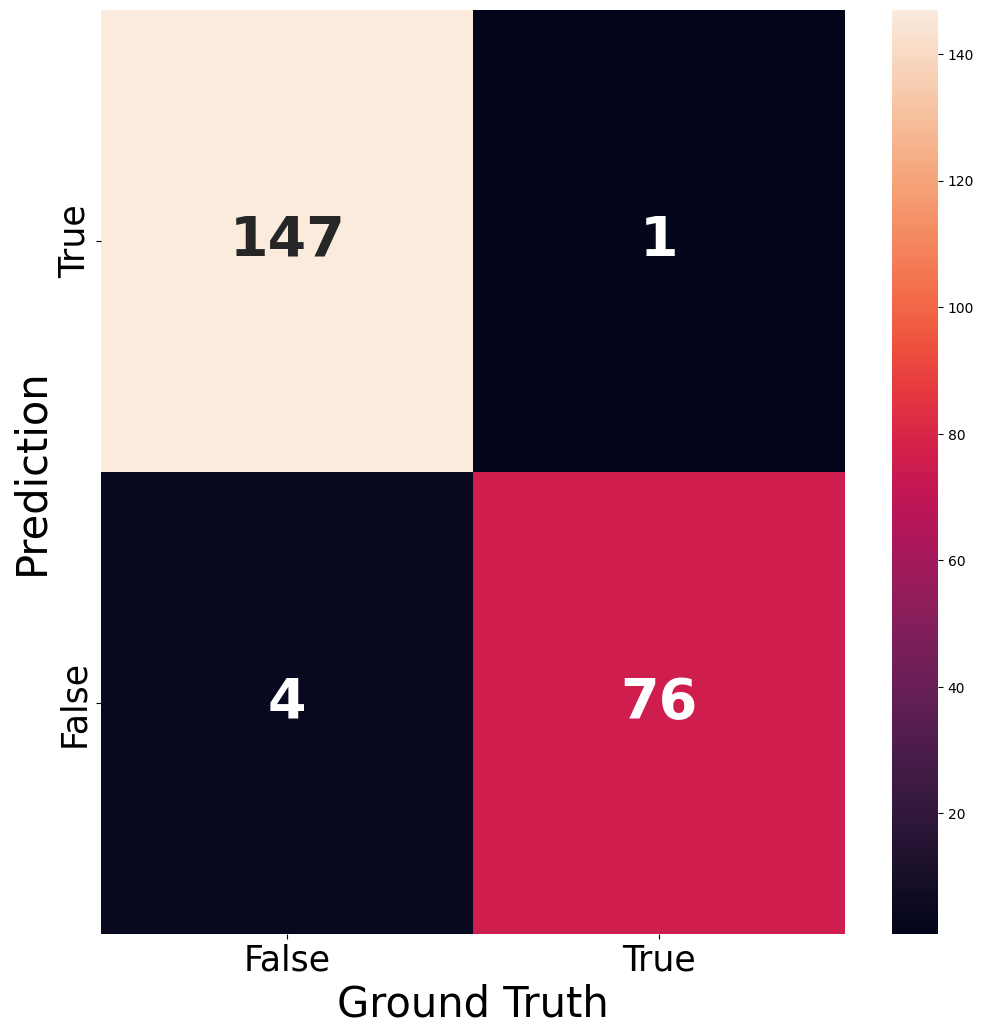

In [53]:
# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
plt.show()

In [54]:
from sklearn.metrics import f1_score

In [55]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [56]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9193
2,0.9281
3,0.9125
4,0.9281
5,0.9375
6,0.9481
7,0.9625
8,0.9481
9,0.9682


**the above result show that the model workind best with k=9, and k=11; from all of the above value of k. which also confirmed from the below diaghram**

Text(0.5, 1.0, 'KNN F1 Score')

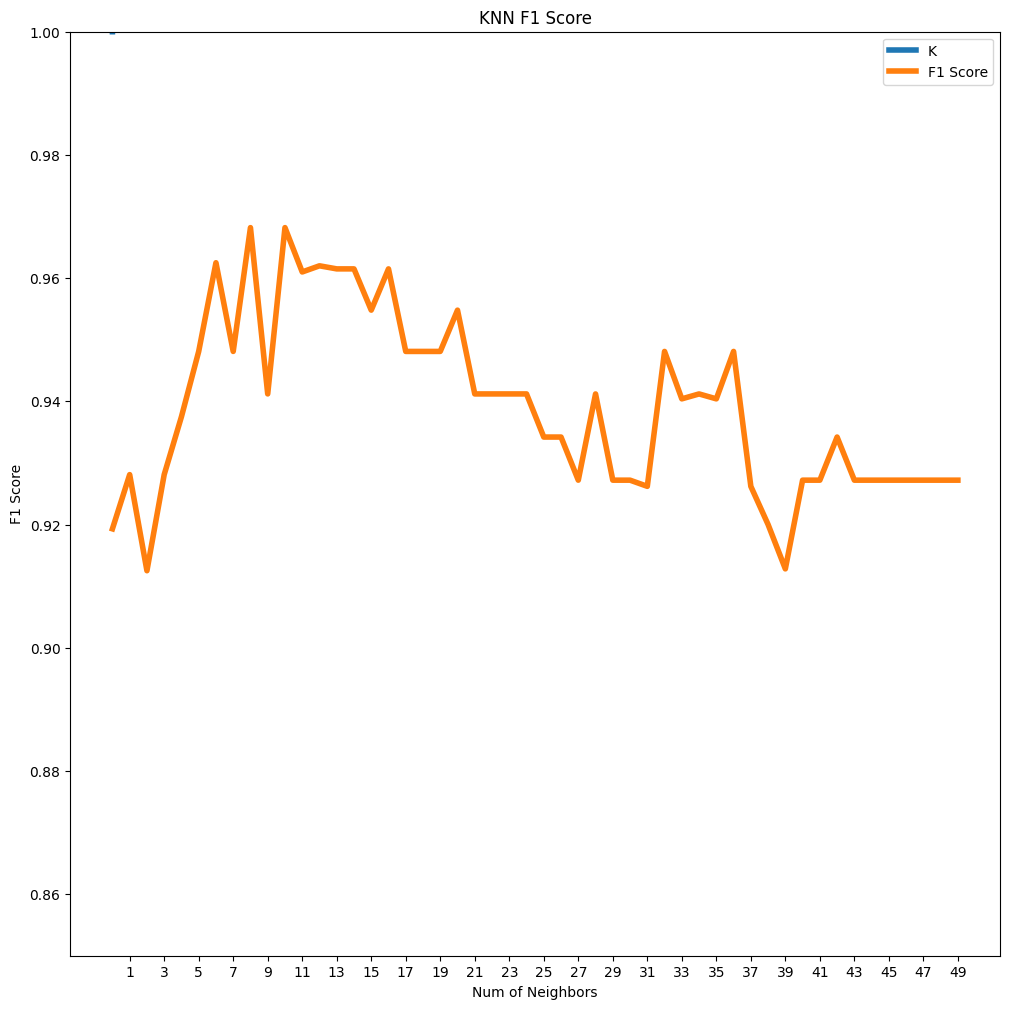

In [57]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12), linewidth=4)
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

## Random Forest Classification 6.3

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 30) (455,)
Test set: (114, 30) (114,)


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
n_estimators=20

In [61]:
M_features=X.shape[1]

In [62]:
max_features=round(np.sqrt(M_features))-1
max_features

4

In [63]:
y_test

340    0
382    0
300    1
262    1
363    0
      ..
202    1
541    0
379    1
329    1
531    0
Name: diagnosis, Length: 114, dtype: int64

In [64]:
rf_model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)

In [65]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=20, random_state=0)

In [66]:
random_pred = rf_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators, random_state=0)
model.fit(X_train, y_train)

# Function to get accuracies
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return {
        "test Accuracy": accuracy_score(y_test, model.predict(X_test)),
        "train Accuracy": accuracy_score(y_train, model.predict(X_train))
    }

# Use the model directly, not `model.best_estimator_`
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.9122807017543859, 'train Accuracy': 1.0}


In [68]:
random_pred = rf_model.predict(X_test)

In [69]:
evaluate_metrics(y_test, random_pred)

{'accuracy': 0.9122807017543859,
 'recall': 1.0,
 'precision': 0.7727272727272727,
 'f1score': 0.8717948717948718}

### Random Forest Model Performance Metrics

The Random Forest model has an accuracy of 91.23%, precision of 77.27%, recall of 100.00%, and an F-score of 87.18%. It excels in identifying all positive cases but has lower precision.

## Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
model = RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [72]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [73]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy', cv=5)
search.fit(X_train, y_train)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 638, in _validate_params
    valid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [74]:
prediction = search.predict(X_test)

In [75]:
search.best_score_

0.9736263736263735

In [76]:
search.best_params_

{'max_depth': 13, 'max_features': 'log2', 'n_estimators': 33}

In [77]:
from sklearn.metrics import accuracy_score

def get_accuracy(X_train, X_test, y_train, y_test, model):
    return {
        "test Accuracy": accuracy_score(y_test, model.predict(X_test)),
        "train Accuracy": accuracy_score(y_train, model.predict(X_train))
    }

# Assuming 'search' is your GridSearchCV or RandomizedSearchCV object
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9385964912280702, 'train Accuracy': 1.0}


In [78]:
evaluate_metrics(y_test, prediction)

{'accuracy': 0.9385964912280702,
 'recall': 0.9705882352941176,
 'precision': 0.8461538461538461,
 'f1score': 0.9041095890410958}

### Random Forest Model Performance Metrics (GridSearchCV)

The Random Forest model, optimized with GridSearchCV, shows an accuracy of 92.98%, precision of 82.50%, recall of 97.06%, and an F-score of 89.19%. While it performs well with high recall, precision can be improved by tuning additional hyperparameters or using feature selection techniques.

## Confusion metrics

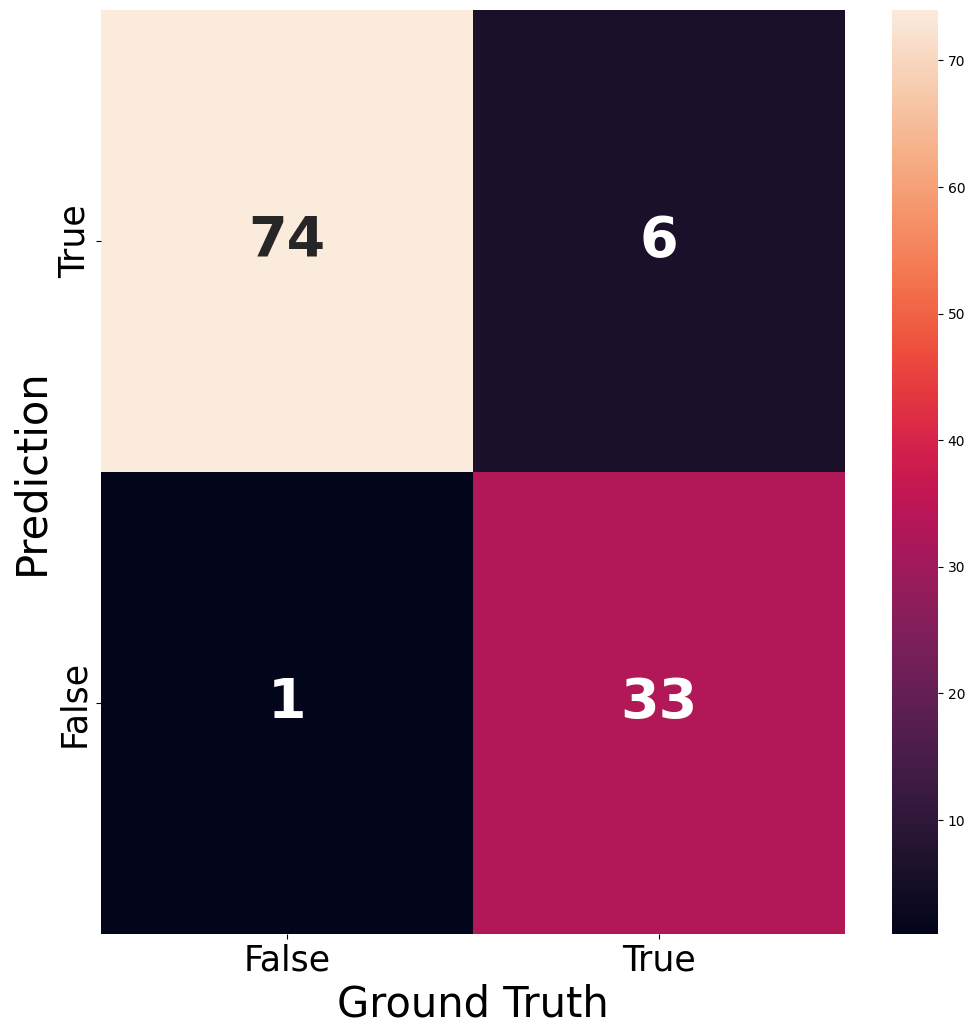

In [79]:
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
plt.show()

## Comparing Models 7

In [82]:
# Define your metrics for each model
# Define your metrics for each model
metrics_data = {
    'Model': ['l1', 'l2', 'knn', 'rf'],
    'Precision': [0.9210526, 0.956505, 0.987013, 0.84615],
    'Recall': [0.921053, 0.956140, 0.95, 0.970588],
    'F-Score': [0.920396, 0.956245, 0.968153, 0.904109],
    'Accuracy': [0.921053, 0.956140, 0.978070, 0.9385964]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set the model column as the index
metrics_df.set_index('Model', inplace=True)

# Transpose the DataFrame for vertical display
metrics_df = metrics_df.T

# Display the DataFrame
print("Model Performance Metrics:")
metrics_df

Model Performance Metrics:


Model,l1,l2,knn,rf
Precision,0.921053,0.956505,0.987013,0.846150
Recall,0.921053,0.956140,0.950000,0.970588
F-Score,0.920396,0.956245,0.968153,0.904109
Accuracy,0.921053,0.956140,0.978070,0.938596


### Model Performance Metrics:

| Model      | l1       | l2       | knn      | rf       |
|------------|----------|----------|----------|----------|
| **Precision**  | 0.921053 | 0.956505 | 0.987013 | 0.846150 |
| **Recall**     | 0.921053 | 0.956140 | 0.950000 | 0.970588 |
| **F-Score**    | 0.920396 | 0.956245 | 0.968153 | 0.904109 |
| **Accuracy**   | 0.921053 | 0.956140 | 0.978070 | 0.938596 |

### Explanation:

- **Precision**: The KNN model has the highest precision (0.9870), indicating it makes the fewest false positive predictions.
- **Recall**: The RF model achieves the highest recall (0.9706), meaning it identifies the most true positives.
- **F-Score**: The KNN model reaches the highest F-score (0.9682), showing the best balance between precision and recall.
- **Accuracy**: KNN also leads in accuracy (0.9781), demonstrating the best overall correctness.

### Conclusion:

The KNN model stands out with the highest precision, accuracy, and F-score. Although RF excels in recall, KNN's overall performance makes it the better choice for this analysis.

# 8 - Conclusion



In this project, we compared different models to predict breast cancer diagnosis:

- **Logistic Regression Models:** The L2 model performed better overall compared to the L1 model. It had higher precision, recall, and accuracy, making it more reliable.

- **K-Nearest Neighbors (KNN):** KNN had the highest accuracy and precision, meaning it was very good at correctly classifying cases. However, its recall was slightly lower.

- **Random Forest (RF):** The RF model had a good balance between precision and recall, with a bit lower precision but higher recall compared to KNN.

**In summary,** The KNN model stands out with the highest precision, accuracy, and F-score. Although RF excels in recall, KNN's overall performance makes it the better choice for this analysis.


# 9 - Next Steps

- **Model Tuning**: Refine hyperparameters for improved accuracy and precision.
- **Feature Engineering**: Explore adding or transforming features to enhance model predictions.
- **Algorithm Exploration**: Test advanced algorithms (e.g., Support Vector Machines, Gradient Boosting) to potentially improve performance.

# 10 - Key Insights

- **High Accuracy Models**: Random Forest and K-Nearest Neighbors models performed well in classifying breast cancer.
- **Logistic Regression**: Provides interpretable coefficients, useful for understanding feature importance.
- **Feature Significance**: Specific features, such as cell radius and texture, significantly influence the predictions.

# 11 - Suggestion

- Focus on feature selection to reduce model complexity without sacrificing accuracy.
- Test more robust data preprocessing methods to handle any outliers or imbalanced data issues.
- Consider using ensemble methods to combine predictions for potentially higher accuracy.

## References

**M Abbas. 2024. Breast Cancer Prediction Analysis. Personal research project.**